In [1]:
# Dependencies
import requests
import json
import requests
import pandas as pd
import numpy as np


In [2]:
from config import api_key

In [3]:

from pprint import pprint
pprint(...)

Ellipsis


In [4]:
url = "https://api.sportsdata.io/v3/nba/scores/json/Players?"

In [5]:
query_url = f"{url}key={api_key}"

In [6]:
response = requests.get(query_url)
response_json = response.json()
pprint(json.dumps(response_json,indent=4, sort_keys=True))


('[\n'
 '    {\n'
 '        "BirthCity": "St. Louis",\n'
 '        "BirthCountry": null,\n'
 '        "BirthDate": "1993-06-28T00:00:00",\n'
 '        "BirthState": "Missouri",\n'
 '        "College": "Florida",\n'
 '        "DepthChartOrder": 0,\n'
 '        "DepthChartPosition": "SF",\n'
 '        "DraftKingsName": "Bradley Beal",\n'
 '        "DraftKingsPlayerID": 606912,\n'
 '        "Experience": 6,\n'
 '        "FanDuelName": "Brad Beal",\n'
 '        "FanDuelPlayerID": 15595,\n'
 '        "FantasyAlarmPlayerID": 200464,\n'
 '        "FantasyDraftName": "Bradley Beal",\n'
 '        "FantasyDraftPlayerID": 606912,\n'
 '        "FirstName": "Bradley",\n'
 '        "GlobalTeamID": 20000001,\n'
 '        "Height": 75,\n'
 '        "HighSchool": null,\n'
 '        "InjuryBodyPart": "Scrambled",\n'
 '        "InjuryNotes": "Scrambled",\n'
 '        "InjuryStartDate": null,\n'
 '        "InjuryStatus": "Scrambled",\n'
 '        "Jersey": 3,\n'
 '        "LastName": "Beal",\n'
 '        

 '        "FanDuelName": "Rajon Rondo",\n'
 '        "FanDuelPlayerID": 9455,\n'
 '        "FantasyAlarmPlayerID": 200529,\n'
 '        "FantasyDraftName": "Rajon Rondo",\n'
 '        "FantasyDraftPlayerID": 262882,\n'
 '        "FirstName": "Rajon",\n'
 '        "GlobalTeamID": 20000027,\n'
 '        "Height": 73,\n'
 '        "HighSchool": null,\n'
 '        "InjuryBodyPart": "Scrambled",\n'
 '        "InjuryNotes": "Scrambled",\n'
 '        "InjuryStartDate": null,\n'
 '        "InjuryStatus": "Scrambled",\n'
 '        "Jersey": 9,\n'
 '        "LastName": "Rondo",\n'
 '        "NbaDotComPlayerID": 200765,\n'
 '        "PhotoUrl": '
 '"https://s3-us-west-2.amazonaws.com/static.fantasydata.com/headshots/nba/low-res/20000530.png",\n'
 '        "PlayerID": 20000530,\n'
 '        "Position": "PG",\n'
 '        "PositionCategory": "G",\n'
 '        "RotoWirePlayerID": 2703,\n'
 '        "RotoworldPlayerID": 1272,\n'
 '        "Salary": 2564753,\n'
 '        "SportRadarPlayerID": "977b67b

 '        "YahooPlayerID": 4632\n'
 '    },\n'
 '    {\n'
 '        "BirthCity": "Monroe",\n'
 '        "BirthCountry": null,\n'
 '        "BirthDate": "1985-02-10T00:00:00",\n'
 '        "BirthState": "Louisiana",\n'
 '        "College": "Louisiana Tech",\n'
 '        "DepthChartOrder": 0,\n'
 '        "DepthChartPosition": "SF",\n'
 '        "DraftKingsName": "Paul Millsap",\n'
 '        "DraftKingsPlayerID": 237675,\n'
 '        "Experience": 12,\n'
 '        "FanDuelName": "Paul Millsap",\n'
 '        "FanDuelPlayerID": 9729,\n'
 '        "FantasyAlarmPlayerID": 200285,\n'
 '        "FantasyDraftName": "Paul Millsap",\n'
 '        "FantasyDraftPlayerID": 237675,\n'
 '        "FirstName": "Paul",\n'
 '        "GlobalTeamID": 20000020,\n'
 '        "Height": 79,\n'
 '        "HighSchool": null,\n'
 '        "InjuryBodyPart": "Scrambled",\n'
 '        "InjuryNotes": "Scrambled",\n'
 '        "InjuryStartDate": null,\n'
 '        "InjuryStatus": "Scrambled",\n'
 '        "Jersey": 4,\n

 '        "Team": "SA",\n'
 '        "TeamID": 24,\n'
 '        "UsaTodayHeadshotNoBackgroundUpdated": "2020-07-28T08:36:17",\n'
 '        "UsaTodayHeadshotNoBackgroundUrl": '
 '"http://cdn.usatsimg.com/api/download/?imageID=14617698",\n'
 '        "UsaTodayHeadshotUpdated": "2020-07-28T08:36:02",\n'
 '        "UsaTodayHeadshotUrl": '
 '"http://cdn.usatsimg.com/api/download/?imageID=14617693",\n'
 '        "UsaTodayPlayerID": 6665391,\n'
 '        "Weight": 180,\n'
 '        "XmlTeamPlayerID": 2070,\n'
 '        "YahooName": "Patty Mills",\n'
 '        "YahooPlayerID": 4660\n'
 '    },\n'
 '    {\n'
 '        "BirthCity": "New York",\n'
 '        "BirthCountry": null,\n'
 '        "BirthDate": "1993-09-20T00:00:00",\n'
 '        "BirthState": "New York",\n'
 '        "College": "UCLA",\n'
 '        "DepthChartOrder": 0,\n'
 '        "DepthChartPosition": "SF",\n'
 '        "DraftKingsName": "Kyle Anderson",\n'
 '        "DraftKingsPlayerID": 697720,\n'
 '        "Experience": 4,\n'
 ' 

 '        "Position": "SF",\n'
 '        "PositionCategory": "F",\n'
 '        "RotoWirePlayerID": 3114,\n'
 '        "RotoworldPlayerID": 1731,\n'
 '        "Salary": 30560700,\n'
 '        "SportRadarPlayerID": "db09f372-9a17-4889-add7-bf8a75ab6da6",\n'
 '        "SportsDataID": "",\n'
 '        "SportsDirectPlayerID": 740245,\n'
 '        "StatsPlayerID": 469218,\n'
 '        "Status": "Active",\n'
 '        "Team": "LAC",\n'
 '        "TeamID": 28,\n'
 '        "UsaTodayHeadshotNoBackgroundUpdated": "2020-07-29T19:40:36",\n'
 '        "UsaTodayHeadshotNoBackgroundUrl": '
 '"http://cdn.usatsimg.com/api/download/?imageID=14637975",\n'
 '        "UsaTodayHeadshotUpdated": "2020-07-29T19:40:54",\n'
 '        "UsaTodayHeadshotUrl": '
 '"http://cdn.usatsimg.com/api/download/?imageID=14637989",\n'
 '        "UsaTodayPlayerID": 6665617,\n'
 '        "Weight": 220,\n'
 '        "XmlTeamPlayerID": 2881,\n'
 '        "YahooName": "Paul George",\n'
 '        "YahooPlayerID": 4725\n'
 '    },\n

 '        "FantasyDraftPlayerID": 333212,\n'
 '        "FirstName": "JaVale",\n'
 '        "GlobalTeamID": 20000027,\n'
 '        "Height": 84,\n'
 '        "HighSchool": null,\n'
 '        "InjuryBodyPart": "Scrambled",\n'
 '        "InjuryNotes": "Scrambled",\n'
 '        "InjuryStartDate": null,\n'
 '        "InjuryStatus": "Scrambled",\n'
 '        "Jersey": 7,\n'
 '        "LastName": "McGee",\n'
 '        "NbaDotComPlayerID": 201580,\n'
 '        "PhotoUrl": '
 '"https://s3-us-west-2.amazonaws.com/static.fantasydata.com/headshots/nba/low-res/20000828.png",\n'
 '        "PlayerID": 20000828,\n'
 '        "Position": "C",\n'
 '        "PositionCategory": "C",\n'
 '        "RotoWirePlayerID": 2930,\n'
 '        "RotoworldPlayerID": 1508,\n'
 '        "Salary": 4000000,\n'
 '        "SportRadarPlayerID": "34ff5b55-42ef-40c0-a2c4-9c28b5476a03",\n'
 '        "SportsDataID": "",\n'
 '        "SportsDirectPlayerID": 733894,\n'
 '        "StatsPlayerID": 333212,\n'
 '        "Status": "Ac

 '        "DepthChartPosition": "PG",\n'
 '        "DraftKingsName": "Ish Smith",\n'
 '        "DraftKingsPlayerID": 329873,\n'
 '        "Experience": 8,\n'
 '        "FanDuelName": "Ishmael Smith",\n'
 '        "FanDuelPlayerID": 12511,\n'
 '        "FantasyAlarmPlayerID": 200472,\n'
 '        "FantasyDraftName": "Ish Smith",\n'
 '        "FantasyDraftPlayerID": 329873,\n'
 '        "FirstName": "Ish",\n'
 '        "GlobalTeamID": 20000001,\n'
 '        "Height": 72,\n'
 '        "HighSchool": null,\n'
 '        "InjuryBodyPart": "Scrambled",\n'
 '        "InjuryNotes": "Scrambled",\n'
 '        "InjuryStartDate": null,\n'
 '        "InjuryStatus": "Scrambled",\n'
 '        "Jersey": 14,\n'
 '        "LastName": "Smith",\n'
 '        "NbaDotComPlayerID": 202397,\n'
 '        "PhotoUrl": '
 '"https://s3-us-west-2.amazonaws.com/static.fantasydata.com/headshots/nba/low-res/20000901.png",\n'
 '        "PlayerID": 20000901,\n'
 '        "Position": "PG",\n'
 '        "PositionCategory": "

 '        "PlayerID": 20001434,\n'
 '        "Position": "PG",\n'
 '        "PositionCategory": "G",\n'
 '        "RotoWirePlayerID": 3526,\n'
 '        "RotoworldPlayerID": 2216,\n'
 '        "Salary": 1620564,\n'
 '        "SportRadarPlayerID": "8e7ffd66-f779-418c-bf18-b9f746a1c5fe",\n'
 '        "SportsDataID": "",\n'
 '        "SportsDirectPlayerID": 755629,\n'
 '        "StatsPlayerID": 739966,\n'
 '        "Status": "Active",\n'
 '        "Team": "PHI",\n'
 '        "TeamID": 7,\n'
 '        "UsaTodayHeadshotNoBackgroundUpdated": "2020-07-28T19:01:11",\n'
 '        "UsaTodayHeadshotNoBackgroundUrl": '
 '"http://cdn.usatsimg.com/api/download/?imageID=14627407",\n'
 '        "UsaTodayHeadshotUpdated": "2020-07-28T19:01:12",\n'
 '        "UsaTodayHeadshotUrl": '
 '"http://cdn.usatsimg.com/api/download/?imageID=14627408",\n'
 '        "UsaTodayPlayerID": 6666677,\n'
 '        "Weight": 180,\n'
 '        "XmlTeamPlayerID": null,\n'
 '        "YahooName": "Raul Neto",\n'
 '        "Yah

 '        "DraftKingsName": "Khem Birch",\n'
 '        "DraftKingsPlayerID": 601518,\n'
 '        "Experience": 1,\n'
 '        "FanDuelName": "Khem Birch",\n'
 '        "FanDuelPlayerID": 16081,\n'
 '        "FantasyAlarmPlayerID": 200242,\n'
 '        "FantasyDraftName": "Khem Birch",\n'
 '        "FantasyDraftPlayerID": 601518,\n'
 '        "FirstName": "Khem",\n'
 '        "GlobalTeamID": 20000005,\n'
 '        "Height": 81,\n'
 '        "HighSchool": null,\n'
 '        "InjuryBodyPart": "Scrambled",\n'
 '        "InjuryNotes": "Scrambled",\n'
 '        "InjuryStartDate": null,\n'
 '        "InjuryStatus": "Scrambled",\n'
 '        "Jersey": 24,\n'
 '        "LastName": "Birch",\n'
 '        "NbaDotComPlayerID": 203920,\n'
 '        "PhotoUrl": '
 '"https://s3-us-west-2.amazonaws.com/static.fantasydata.com/headshots/nba/low-res/20001630.png",\n'
 '        "PlayerID": 20001630,\n'
 '        "Position": "C",\n'
 '        "PositionCategory": "C",\n'
 '        "RotoWirePlayerID": 3628,

 '        "SportsDirectPlayerID": 751364,\n'
 '        "StatsPlayerID": 698664,\n'
 '        "Status": "Active",\n'
 '        "Team": "MIN",\n'
 '        "TeamID": 16,\n'
 '        "UsaTodayHeadshotNoBackgroundUpdated": "2019-10-14T09:56:42",\n'
 '        "UsaTodayHeadshotNoBackgroundUrl": '
 '"http://cdn.usatsimg.com/api/download/?imageID=13514808",\n'
 '        "UsaTodayHeadshotUpdated": "2019-10-09T17:16:12",\n'
 '        "UsaTodayHeadshotUrl": '
 '"http://cdn.usatsimg.com/api/download/?imageID=13477258",\n'
 '        "UsaTodayPlayerID": 6665079,\n'
 '        "Weight": 209,\n'
 '        "XmlTeamPlayerID": null,\n'
 '        "YahooName": "Jake Layman",\n'
 '        "YahooPlayerID": 5678\n'
 '    },\n'
 '    {\n'
 '        "BirthCity": "Columbus",\n'
 '        "BirthCountry": null,\n'
 '        "BirthDate": "1994-08-25T00:00:00",\n'
 '        "BirthState": "Ohio",\n'
 '        "College": "Michigan",\n'
 '        "DepthChartOrder": 0,\n'
 '        "DepthChartPosition": "SG",\n'
 '     

 '        "HighSchool": null,\n'
 '        "InjuryBodyPart": "Scrambled",\n'
 '        "InjuryNotes": "Scrambled",\n'
 '        "InjuryStartDate": null,\n'
 '        "InjuryStatus": "Scrambled",\n'
 '        "Jersey": 24,\n'
 '        "LastName": "Markkanen",\n'
 '        "NbaDotComPlayerID": 1628374,\n'
 '        "PhotoUrl": '
 '"https://s3-us-west-2.amazonaws.com/static.fantasydata.com/headshots/nba/low-res/20001831.png",\n'
 '        "PlayerID": 20001831,\n'
 '        "Position": "PF",\n'
 '        "PositionCategory": "F",\n'
 '        "RotoWirePlayerID": 4119,\n'
 '        "RotoworldPlayerID": 2783,\n'
 '        "Salary": 5300400,\n'
 '        "SportRadarPlayerID": "583d7994-36f9-4a9a-b527-c18704406981",\n'
 '        "SportsDataID": "",\n'
 '        "SportsDirectPlayerID": 774823,\n'
 '        "StatsPlayerID": 949131,\n'
 '        "Status": "Active",\n'
 '        "Team": "CHI",\n'
 '        "TeamID": 11,\n'
 '        "UsaTodayHeadshotNoBackgroundUpdated": "2020-07-27T22:55:24",\n'


 '        "DraftKingsName": "Edmond Sumner",\n'
 '        "DraftKingsPlayerID": 843846,\n'
 '        "Experience": 1,\n'
 '        "FanDuelName": "Edmond Sumner",\n'
 '        "FanDuelPlayerID": 58270,\n'
 '        "FantasyAlarmPlayerID": 200999,\n'
 '        "FantasyDraftName": "Edmond Sumner",\n'
 '        "FantasyDraftPlayerID": 843846,\n'
 '        "FirstName": "Edmond",\n'
 '        "GlobalTeamID": 20000013,\n'
 '        "Height": 76,\n'
 '        "HighSchool": null,\n'
 '        "InjuryBodyPart": "Scrambled",\n'
 '        "InjuryNotes": "Scrambled",\n'
 '        "InjuryStartDate": null,\n'
 '        "InjuryStatus": "Scrambled",\n'
 '        "Jersey": 5,\n'
 '        "LastName": "Sumner",\n'
 '        "NbaDotComPlayerID": 1628410,\n'
 '        "PhotoUrl": '
 '"https://s3-us-west-2.amazonaws.com/static.fantasydata.com/headshots/nba/low-res/20001875.png",\n'
 '        "PlayerID": 20001875,\n'
 '        "Position": "PG",\n'
 '        "PositionCategory": "G",\n'
 '        "RotoWirePla

 '        "UsaTodayHeadshotNoBackgroundUpdated": "2019-10-14T09:49:43",\n'
 '        "UsaTodayHeadshotNoBackgroundUrl": '
 '"http://cdn.usatsimg.com/api/download/?imageID=13514595",\n'
 '        "UsaTodayHeadshotUpdated": "2019-10-09T17:16:12",\n'
 '        "UsaTodayHeadshotUrl": '
 '"http://cdn.usatsimg.com/api/download/?imageID=13477243",\n'
 '        "UsaTodayPlayerID": 6665089,\n'
 '        "Weight": 213,\n'
 '        "XmlTeamPlayerID": null,\n'
 '        "YahooName": "Josh Okogie",\n'
 '        "YahooPlayerID": 6031\n'
 '    },\n'
 '    {\n'
 '        "BirthCity": null,\n'
 '        "BirthCountry": null,\n'
 '        "BirthDate": "1999-06-08T00:00:00",\n'
 '        "BirthState": null,\n'
 '        "College": null,\n'
 '        "DepthChartOrder": 1,\n'
 '        "DepthChartPosition": "SG",\n'
 '        "DraftKingsName": "Anfernee Simons",\n'
 '        "DraftKingsPlayerID": 1121307,\n'
 '        "Experience": 0,\n'
 '        "FanDuelName": "Anfernee Simons",\n'
 '        "FanDuelPla

 '        "YahooName": "Bruce Brown",\n'
 '        "YahooPlayerID": 6053\n'
 '    },\n'
 '    {\n'
 '        "BirthCity": null,\n'
 '        "BirthCountry": null,\n'
 '        "BirthDate": "1996-01-23T00:00:00",\n'
 '        "BirthState": null,\n'
 '        "College": "Ohio State",\n'
 '        "DepthChartOrder": 1,\n'
 '        "DepthChartPosition": "SF",\n'
 '        "DraftKingsName": "Keita Bates-Diop",\n'
 '        "DraftKingsPlayerID": 844045,\n'
 '        "Experience": 0,\n'
 '        "FanDuelName": "Keita Bates-Diop",\n'
 '        "FanDuelPlayerID": 84688,\n'
 '        "FantasyAlarmPlayerID": 201183,\n'
 '        "FantasyDraftName": "Keita Bates-Diop",\n'
 '        "FantasyDraftPlayerID": 844045,\n'
 '        "FirstName": "Keita",\n'
 '        "GlobalTeamID": 20000020,\n'
 '        "Height": 80,\n'
 '        "HighSchool": null,\n'
 '        "InjuryBodyPart": "Scrambled",\n'
 '        "InjuryNotes": "Scrambled",\n'
 '        "InjuryStartDate": null,\n'
 '        "InjuryStatus": "

 '        "UsaTodayHeadshotNoBackgroundUrl": '
 '"http://cdn.usatsimg.com/api/download/?imageID=14628272",\n'
 '        "UsaTodayHeadshotUpdated": "2020-07-28T20:32:11",\n'
 '        "UsaTodayHeadshotUrl": '
 '"http://cdn.usatsimg.com/api/download/?imageID=14628270",\n'
 '        "UsaTodayPlayerID": 6666562,\n'
 '        "Weight": 214,\n'
 '        "XmlTeamPlayerID": null,\n'
 '        "YahooName": "RJ Barrett",\n'
 '        "YahooPlayerID": 6165\n'
 '    },\n'
 '    {\n'
 '        "BirthCity": null,\n'
 '        "BirthCountry": null,\n'
 '        "BirthDate": null,\n'
 '        "BirthState": null,\n'
 '        "College": "Texas Tech",\n'
 '        "DepthChartOrder": 1,\n'
 '        "DepthChartPosition": "SG",\n'
 '        "DraftKingsName": "Jarrett Culver",\n'
 '        "DraftKingsPlayerID": 1078671,\n'
 '        "Experience": 0,\n'
 '        "FanDuelName": "Jarrett Culver",\n'
 '        "FanDuelPlayerID": 110333,\n'
 '        "FantasyAlarmPlayerID": 201272,\n'
 '        "FantasyDraft

 '        "UsaTodayHeadshotUrl": '
 '"http://cdn.usatsimg.com/api/download/?imageID=13454627",\n'
 '        "UsaTodayPlayerID": 6665585,\n'
 '        "Weight": 190,\n'
 '        "XmlTeamPlayerID": null,\n'
 '        "YahooName": "Justin James",\n'
 '        "YahooPlayerID": 6228\n'
 '    },\n'
 '    {\n'
 '        "BirthCity": null,\n'
 '        "BirthCountry": null,\n'
 '        "BirthDate": null,\n'
 '        "BirthState": null,\n'
 '        "College": "Tennessee",\n'
 '        "DepthChartOrder": 1,\n'
 '        "DepthChartPosition": "SG",\n'
 '        "DraftKingsName": "Admiral Schofield",\n'
 '        "DraftKingsPlayerID": 887494,\n'
 '        "Experience": 0,\n'
 '        "FanDuelName": "Admiral Schofield",\n'
 '        "FanDuelPlayerID": 110328,\n'
 '        "FantasyAlarmPlayerID": 201233,\n'
 '        "FantasyDraftName": "Admiral Schofield",\n'
 '        "FantasyDraftPlayerID": 887494,\n'
 '        "FirstName": "Admiral",\n'
 '        "GlobalTeamID": 20000001,\n'
 '        "Heig

 '        "RotoWirePlayerID": 4940,\n'
 '        "RotoworldPlayerID": null,\n'
 '        "Salary": null,\n'
 '        "SportRadarPlayerID": "c21994c6-ce10-4595-b695-2a16f8154f9e",\n'
 '        "SportsDataID": "",\n'
 '        "SportsDirectPlayerID": 767414,\n'
 '        "StatsPlayerID": 899762,\n'
 '        "Status": "Active",\n'
 '        "Team": "LAL",\n'
 '        "TeamID": 27,\n'
 '        "UsaTodayHeadshotNoBackgroundUpdated": "2020-07-29T11:38:14",\n'
 '        "UsaTodayHeadshotNoBackgroundUrl": '
 '"http://cdn.usatsimg.com/api/download/?imageID=14634324",\n'
 '        "UsaTodayHeadshotUpdated": "2020-07-29T11:37:43",\n'
 '        "UsaTodayHeadshotUrl": '
 '"http://cdn.usatsimg.com/api/download/?imageID=14634323",\n'
 '        "UsaTodayPlayerID": 6665676,\n'
 '        "Weight": 240,\n'
 '        "XmlTeamPlayerID": null,\n'
 '        "YahooName": "Devontae Cacok",\n'
 '        "YahooPlayerID": 6292\n'
 '    },\n'
 '    {\n'
 '        "BirthCity": null,\n'
 '        "BirthCountry":

In [7]:
response_json[0]

{'PlayerID': 20000441,
 'SportsDataID': '',
 'Status': 'Active',
 'TeamID': 1,
 'Team': 'WAS',
 'Jersey': 3,
 'PositionCategory': 'G',
 'Position': 'SG',
 'FirstName': 'Bradley',
 'LastName': 'Beal',
 'Height': 75,
 'Weight': 207,
 'BirthDate': '1993-06-28T00:00:00',
 'BirthCity': 'St. Louis',
 'BirthState': 'Missouri',
 'BirthCountry': None,
 'HighSchool': None,
 'College': 'Florida',
 'Salary': 27093019,
 'PhotoUrl': 'https://s3-us-west-2.amazonaws.com/static.fantasydata.com/headshots/nba/low-res/20000441.png',
 'Experience': 6,
 'SportRadarPlayerID': 'ff461754-ad20-4eeb-af02-2b46cc980b24',
 'RotoworldPlayerID': 1966,
 'RotoWirePlayerID': 3303,
 'FantasyAlarmPlayerID': 200464,
 'StatsPlayerID': 606912,
 'SportsDirectPlayerID': 750970,
 'XmlTeamPlayerID': 3395,
 'InjuryStatus': 'Scrambled',
 'InjuryBodyPart': 'Scrambled',
 'InjuryStartDate': None,
 'InjuryNotes': 'Scrambled',
 'FanDuelPlayerID': 15595,
 'DraftKingsPlayerID': 606912,
 'YahooPlayerID': 5009,
 'FanDuelName': 'Brad Beal',

In [8]:
players=pd.DataFrame(response_json)

In [9]:
players.to_pickle('players.pkl')
players.to_csv('players.csv', index=False)

In [4]:
players = pd.read_pickle('players.pkl')

In [5]:
players.head()


,PlayerID,SportsDataID,Status,TeamID,Team,Jersey,PositionCategory,Position,FirstName,LastName,...,DepthChartOrder,GlobalTeamID,FantasyDraftName,FantasyDraftPlayerID,UsaTodayPlayerID,UsaTodayHeadshotUrl,UsaTodayHeadshotNoBackgroundUrl,UsaTodayHeadshotUpdated,UsaTodayHeadshotNoBackgroundUpdated,NbaDotComPlayerID
0,20000441,,Active,1,WAS,3.0,G,SG,Bradley,Beal,...,0.0,20000001,Bradley Beal,606912,6665831.0,http://cdn.usatsimg.com/api/download/?imageID=...,http://cdn.usatsimg.com/api/download/?imageID=...,2019-10-09T17:16:12,2019-10-14T10:03:12,203078
1,20000442,,Active,1,WAS,2.0,G,PG,John,Wall,...,NaN,20000001,John Wall,509456,6665881.0,http://cdn.usatsimg.com/api/download/?imageID=...,http://cdn.usatsimg.com/api/download/?imageID=...,2020-07-27T22:58:53,2020-07-27T22:57:46,202322
2,20000443,,Active,11,CHI,22.0,F,SF,Otto,Porter,...,1.0,20000011,Otto Porter Jr.,609256,6666363.0,http://cdn.usatsimg.com/api/download/?imageID=...,http://cdn.usatsimg.com/api/download/?imageID=...,2020-07-27T22:56:17,2020-07-27T22:58:44,203490
3,20000452,,Active,8,BKN,17.0,G,SG,Garrett,Temple,...,1.0,20000008,Garrett Temple,263903,6666546.0,http://cdn.usatsimg.com/api/download/?imageID=...,http://cdn.usatsimg.com/api/download/?imageID=...,2019-11-26T10:22:31,2019-11-26T10:22:39,202066
4,20000453,,Active,5,ORL,31.0,G,SG,Terrence,Ross,...,1.0,20000005,Terrence Ross,550049,6666031.0,http://cdn.usatsimg.com/api/download/?imageID=...,http://cdn.usatsimg.com/api/download/?imageID=...,2019-10-09T17:16:12,2019-10-14T10:06:01,203082


In [6]:
players.columns

Index(['PlayerID', 'SportsDataID', 'Status', 'TeamID', 'Team', 'Jersey',
       'PositionCategory', 'Position', 'FirstName', 'LastName', 'Height',
       'Weight', 'BirthDate', 'BirthCity', 'BirthState', 'BirthCountry',
       'HighSchool', 'College', 'Salary', 'PhotoUrl', 'Experience',
       'SportRadarPlayerID', 'RotoworldPlayerID', 'RotoWirePlayerID',
       'FantasyAlarmPlayerID', 'StatsPlayerID', 'SportsDirectPlayerID',
       'XmlTeamPlayerID', 'InjuryStatus', 'InjuryBodyPart', 'InjuryStartDate',
       'InjuryNotes', 'FanDuelPlayerID', 'DraftKingsPlayerID', 'YahooPlayerID',
       'FanDuelName', 'DraftKingsName', 'YahooName', 'DepthChartPosition',
       'DepthChartOrder', 'GlobalTeamID', 'FantasyDraftName',
       'FantasyDraftPlayerID', 'UsaTodayPlayerID', 'UsaTodayHeadshotUrl',
       'UsaTodayHeadshotNoBackgroundUrl', 'UsaTodayHeadshotUpdated',
       'UsaTodayHeadshotNoBackgroundUpdated', 'NbaDotComPlayerID'],
      dtype='object')

In [7]:
use_col = ['Team', 'PositionCategory','Position', 'FirstName', 'LastName', 'Height', 'Weight', 'BirthDate', 'BirthCity', 'BirthState', 
                        'BirthCountry', 'College', 'Salary', 'PhotoUrl', 'Experience']

In [8]:
healthinfo_df = players[use_col].copy()
healthinfo_df

,Team,PositionCategory,Position,FirstName,LastName,Height,Weight,BirthDate,BirthCity,BirthState,BirthCountry,College,Salary,PhotoUrl,Experience
0,WAS,G,SG,Bradley,Beal,75,207,1993-06-28T00:00:00,St. Louis,Missouri,None,Florida,27093019.0,https://s3-us-west-2.amazonaws.com/static.fant...,6
1,WAS,G,PG,John,Wall,76,210,1990-09-06T00:00:00,Raleigh,North Carolina,None,Kentucky,38199000.0,https://s3-us-west-2.amazonaws.com/static.fant...,8
2,CHI,F,SF,Otto,Porter,80,198,1993-06-03T00:00:00,St. Louis,Missouri,None,Georgetown,27250575.0,https://s3-us-west-2.amazonaws.com/static.fant...,5
3,BKN,G,SG,Garrett,Temple,77,195,1986-05-08T00:00:00,Baton Rouge,Louisiana,None,LSU,4767000.0,https://s3-us-west-2.amazonaws.com/static.fant...,8
4,ORL,G,SG,Terrence,Ross,78,206,1991-02-05T00:00:00,Portland,Oregon,Oregon,Washington,12500000.0,https://s3-us-west-2.amazonaws.com/static.fant...,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,CHA,G,PG,Caleb,Martin,77,205,None,None,None,None,Nevada,898310.0,https://s3-us-west-2.amazonaws.com/static.fant...,0
506,TOR,F,PF,Terence,Davis,76,201,None,None,None,None,Ole Miss,898310.0,https://s3-us-west-2.amazonaws.com/static.fant...,0
507,GS,G,PG,Mychal,Mulder,76,184,None,None,None,None,Kentucky,NaN,https://s3-us-west-2.amazonaws.com/static.fant...,0
508,MEM,G,PG,Marko,Guduric,78,201,None,None,None,None,None,2625000.0,https://s3-us-west-2.amazonaws.com/static.fant...,0


In [9]:
healthinfo_df['BMI'] = np.round((healthinfo_df['Weight']/healthinfo_df['Height']**2) * 703, decimals = 2)
healthinfo_df.head()

,Team,PositionCategory,Position,FirstName,LastName,Height,Weight,BirthDate,BirthCity,BirthState,BirthCountry,College,Salary,PhotoUrl,Experience,BMI
0,WAS,G,SG,Bradley,Beal,75,207,1993-06-28T00:00:00,St. Louis,Missouri,None,Florida,27093019.0,https://s3-us-west-2.amazonaws.com/static.fant...,6,25.87
1,WAS,G,PG,John,Wall,76,210,1990-09-06T00:00:00,Raleigh,North Carolina,None,Kentucky,38199000.0,https://s3-us-west-2.amazonaws.com/static.fant...,8,25.56
2,CHI,F,SF,Otto,Porter,80,198,1993-06-03T00:00:00,St. Louis,Missouri,None,Georgetown,27250575.0,https://s3-us-west-2.amazonaws.com/static.fant...,5,21.75
3,BKN,G,SG,Garrett,Temple,77,195,1986-05-08T00:00:00,Baton Rouge,Louisiana,None,LSU,4767000.0,https://s3-us-west-2.amazonaws.com/static.fant...,8,23.12
4,ORL,G,SG,Terrence,Ross,78,206,1991-02-05T00:00:00,Portland,Oregon,Oregon,Washington,12500000.0,https://s3-us-west-2.amazonaws.com/static.fant...,6,23.80


In [10]:
healthinfo_df['PLAYER_NAME'] = healthinfo_df['FirstName'] + ' ' + healthinfo_df['LastName']

In [11]:
# Percentage of players
with open('./_players_all_data.json') as json_file:
    data = json.load(json_file)

stats = pd.read_json(data)
stats.head()


,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,...,DREB,REB,AST,STL,BLK,TOV,PF,PTS,YIL,PLAYER_NAME
0,1628605,2019-20,0,1610612763,MEM,26,2,0.0,13.0,4,...,1.0,1.0,0,0.0,0.0,0.0,1,12,2,Dusty Hannahs
1,1629658,2019-20,0,1610612757,POR,21,13,0.0,103.0,15,...,18.0,32.0,4,5.0,0.0,4.0,12,38,1,Jaylen Hoard
2,1629682,2019-20,0,1610612738,BOS,22,11,1.0,119.0,14,...,12.0,12.0,16,10.0,2.0,15.0,13,40,1,Tremont Waters
3,1628407,2019-20,0,1610612766,CHA,24,39,11.0,687.0,85,...,85.0,100.0,52,23.0,2.0,37.0,52,224,3,Dwayne Bacon
4,1629644,2019-20,0,1610612748,MIA,21,5,0.0,26.0,3,...,4.0,5.0,1,2.0,1.0,1.0,2,7,1,KZ Okpala


In [12]:
stats.columns

Index(['PLAYER_ID', 'SEASON_ID', 'LEAGUE_ID', 'TEAM_ID', 'TEAM_ABBREVIATION',
       'PLAYER_AGE', 'GP', 'GS', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A',
       'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'PTS', 'YIL', 'PLAYER_NAME'],
      dtype='object')

In [13]:
def agg_stats(rows):
    num_season = rows['SEASON_ID'].nunique()
    num_games = rows['GP'].sum()
    min_game = (rows['MIN']/rows['GP']).mean()
    age = rows['PLAYER_AGE'].max()
    return pd.Series({'age': age, 'num_season': num_season, 'num_games': num_games, 'min_game': min_game})

In [14]:
player_stats = stats.groupby('PLAYER_NAME').apply(agg_stats).reset_index()
player_stats.head()

,PLAYER_NAME,age,num_season,num_games,min_game
0,A.C. Green,26.0,5.0,407.0,28.590398
1,A.J. Bramlett,23.0,1.0,8.0,7.625000
2,A.J. English,24.0,2.0,151.0,20.584921
3,A.J. Guyton,25.0,3.0,80.0,12.327609
4,A.J. Wynder,26.0,1.0,6.0,6.500000


In [15]:
combined = healthinfo_df.merge(player_stats, on='PLAYER_NAME')

In [16]:
combined.corr()

,Height,Weight,Salary,Experience,BMI,age,num_season,num_games,min_game
Height,1.000000,0.767349,0.057683,0.042915,-0.005967,-0.010584,0.081651,0.066729,-0.021289
Weight,0.767349,1.000000,0.131230,0.127235,0.634249,0.051189,0.157851,0.166834,0.078896
Salary,0.057683,0.131230,1.000000,0.497645,0.125005,0.157041,0.539277,0.585424,0.562716
Experience,0.042915,0.127235,0.497645,1.000000,0.134439,0.341921,0.715453,0.740117,0.501489
BMI,-0.005967,0.634249,0.125005,0.134439,1.000000,0.087346,0.135638,0.169176,0.144124
age,-0.010584,0.051189,0.157041,0.341921,0.087346,1.000000,0.546030,0.462856,0.105156
num_season,0.081651,0.157851,0.539277,0.715453,0.135638,0.546030,1.000000,0.919341,0.573530
num_games,0.066729,0.166834,0.585424,0.740117,0.169176,0.462856,0.919341,1.000000,0.705025
min_game,-0.021289,0.078896,0.562716,0.501489,0.144124,0.105156,0.573530,0.705025,1.000000


In [17]:
combined.columns

Index(['Team', 'PositionCategory', 'Position', 'FirstName', 'LastName',
       'Height', 'Weight', 'BirthDate', 'BirthCity', 'BirthState',
       'BirthCountry', 'College', 'Salary', 'PhotoUrl', 'Experience', 'BMI',
       'PLAYER_NAME', 'age', 'num_season', 'num_games', 'min_game'],
      dtype='object')

In [18]:
combined 

,Team,PositionCategory,Position,FirstName,LastName,Height,Weight,BirthDate,BirthCity,BirthState,...,College,Salary,PhotoUrl,Experience,BMI,PLAYER_NAME,age,num_season,num_games,min_game
0,WAS,G,SG,Bradley,Beal,75,207,1993-06-28T00:00:00,St. Louis,Missouri,...,Florida,27093019.0,https://s3-us-west-2.amazonaws.com/static.fant...,6,25.87,Bradley Beal,24.0,5.0,324.0,33.034876
1,WAS,G,PG,John,Wall,76,210,1990-09-06T00:00:00,Raleigh,North Carolina,...,Kentucky,38199000.0,https://s3-us-west-2.amazonaws.com/static.fant...,8,25.56,John Wall,24.0,5.0,345.0,35.773273
2,BKN,G,SG,Garrett,Temple,77,195,1986-05-08T00:00:00,Baton Rouge,Louisiana,...,LSU,4767000.0,https://s3-us-west-2.amazonaws.com/static.fant...,8,23.12,Garrett Temple,25.0,2.0,57.0,10.385527
3,ORL,G,SG,Terrence,Ross,78,206,1991-02-05T00:00:00,Portland,Oregon,...,Washington,12500000.0,https://s3-us-west-2.amazonaws.com/static.fant...,6,23.80,Terrence Ross,26.0,5.0,363.0,23.084496
4,MEM,C,C,Jonas,Valanciunas,83,265,1992-05-06T00:00:00,Utena,Lithuania,...,None,16000000.0,https://s3-us-west-2.amazonaws.com/static.fant...,6,27.04,Jonas Valanciunas,25.0,5.0,363.0,26.010213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460,WAS,G,PG,Garrison,Mathews,77,215,None,None,None,...,Lipscomb,NaN,https://s3-us-west-2.amazonaws.com/static.fant...,0,25.49,Garrison Mathews,23.0,1.0,18.0,12.611111
461,CHA,G,PG,Caleb,Martin,77,205,None,None,None,...,Nevada,898310.0,https://s3-us-west-2.amazonaws.com/static.fant...,0,24.31,Caleb Martin,24.0,1.0,18.0,17.611111
462,TOR,F,PF,Terence,Davis,76,201,None,None,None,...,Ole Miss,898310.0,https://s3-us-west-2.amazonaws.com/static.fant...,0,24.46,Terence Davis,23.0,1.0,72.0,16.791667
463,MEM,G,PG,Marko,Guduric,78,201,None,None,None,...,None,2625000.0,https://s3-us-west-2.amazonaws.com/static.fant...,0,23.23,Marko Guduric,25.0,1.0,44.0,11.000000


In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

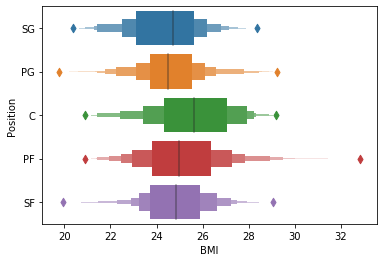

In [20]:
sns.boxenplot(y='Position', x='BMI', data=combined)

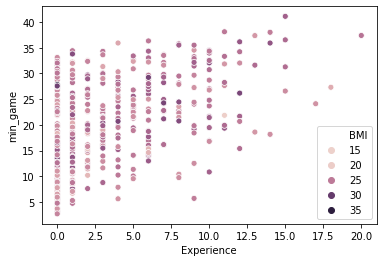

In [21]:
sns.scatterplot(y='min_game', x='Experience', hue = 'BMI', data=combined)

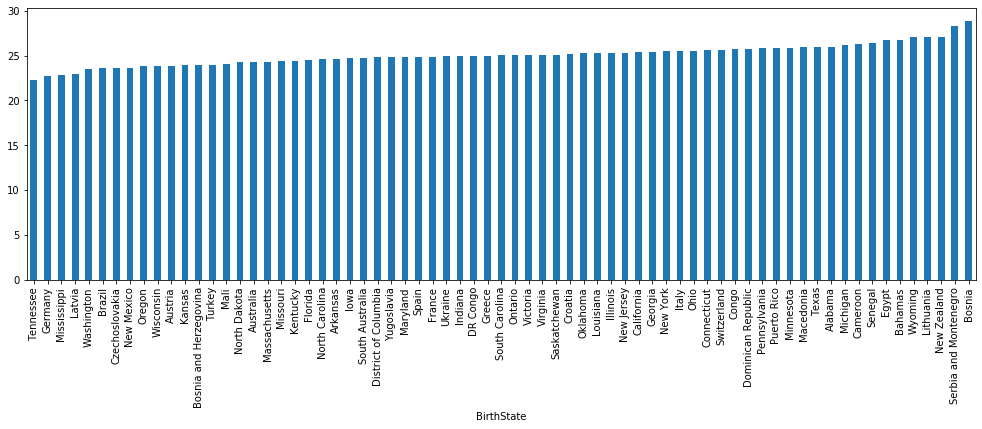

In [38]:
combined.groupby('BirthState')['BMI'].mean().sort_values().plot(kind='bar', figsize=(17,5))


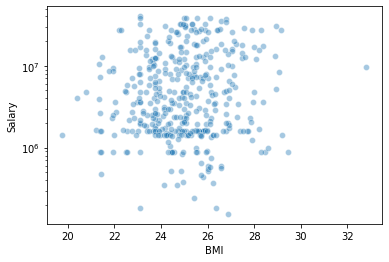

In [23]:
sns.scatterplot(y='Salary', x='BMI', data=combined, alpha=0.4)
plt.yscale('log')

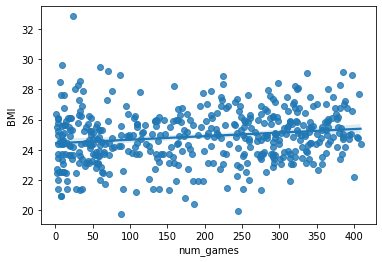

In [24]:
sns.regplot(x='num_games', y='BMI', data=combined)

In [25]:
import plotly.express as px
import plotly.graph_objects as go

In [30]:
fig = px.scatter(combined, y='Salary', x='BMI',title='Salary vs. BMI',hover_data=['PLAYER_NAME','Experience'])
fig.update_traces(marker_color='rgb(224,71,89)', marker_line_color='rgb(218,59,08)',
                  marker_line_width=1, opacity=0.9),
fig.update_layout({'plot_bgcolor': '#0a1b29'})
fig.update_layout(title_text='Salary vs. BMI Scatter Plot', title_x=0.5)
fig.show()
fig.write_html('salary_bmi_player_name_scatter.html')


In [31]:
fig.write_html('min_game_experience_bmi_scatter.html')

In [32]:
fig = px.scatter(combined, y='min_game', x='Experience',color='BMI', hover_data=['PLAYER_NAME'], 
                 color_continuous_scale = [[0,'rgb(255,215,0)'],
                                           [.2,'rgb(255,99,71)'],
                                           [.4,'rgb(0,128,128)'],
                                           [.6,'rgb(192,192,192)'],
                                           [.8,'rgb(139,69,19)'],
                                           [1.0,'rgb(0,0,0)']
                                          ])

fig.update_layout({'plot_bgcolor': '#0a1b29'})
fig.update_layout(title_text='Minutes Per Game vs. Experience Scatter Plot', title_x=0.5)

fig.show()
fig.write_html('min_game_experience_bmi_scatter.html')

In [33]:
fig = px.box(combined, y='Position', x='BMI', color='Position',
                  color_discrete_map = {'SG': 'rgb(255,215,0)',
                                           'PG':'rgb(255,99,71)',                                       
                                          'C':'rgb(0,128,128)',
                                       'PF':'rgb(192,192,192)',
                                        'SF':'rgb(139,69,19)'})
    
fig.update_layout({'plot_bgcolor': '#0a1b29'})
fig.update_layout(title_text='Position vs. BMI Box Whisker Plot', title_x=0.5)
fig.show()
fig.write_html('Position_BMI_box.html')

In [118]:
fig.write_html('PositionCategory_BMI_violinbox.html')

In [34]:
fig = px.violin(combined, y='PositionCategory', x='BMI', color='PositionCategory', box=True,
                                 color_discrete_map = {'G': 'rgb(255,215,0)',
                                           'C':'rgb(255,99,71)',                                       
                                          'F':'rgb(0,128,128)'})
fig.update_layout({'plot_bgcolor': '#0a1b29'})
fig.update_layout(title_text='Position vs. BMI Violin Box Whisker Plot', title_x=0.5)
fig.show()
fig.write_html('PositionCategory_BMI_violinbox.html')


